
 ### Dikerjakan oleh
 #### Email : iamdamar.4739@gmail.com
 #### Nama : Damar Djati Wahyu K

### Import Library

In [195]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Prepare Data

### Import Dataset dari Lokal disk

In [254]:
dataAirBnb = pd.read_csv('NYC AirBnB Dummy Data - DAMC_C.csv', sep=";", header=0, skipinitialspace=True, encoding='ISO-8859-1')
headers = ['listing_id', 'description', 'room_type', 'price', 'neighborhood_full', 'host_name', 'last_review']
dataAirBnb.columns = headers 

## Eksplorasi Data

### Menampilkan sedikitnya 10 data teratas dari dataset Nyc AirBnb

In [89]:
dataAirBnb.head(10)

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,21/06/2009
5,5295,Beautiful 1br on Upper West Side,Entire home/apt,135 dollars,"Manhattan, Upper West Side",Lena,21/06/2022
6,5441,Central Manhattan/near Broadway,Private room,85 dollars,"Manhattan, Hell's Kitchen",Kate,21/06/2023
7,5803,"Lovely Room 1, Garden, Best Area, Legal rental",Private room,89 dollars,"Brooklyn, South Slope",Laurie,21/06/2024
8,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,Private room,85 dollars,"Manhattan, Upper West Side",Claudio,21/07/2005
9,6848,Only 2 stops to Manhattan studio,entire home/apt,140 dollars,"Brooklyn, Williamsburg",Allen & Irina,21/06/2029


#### Mencoba untuk melihat deskripsi data secara detail dari kolom Price pada dataset Nyc AirBnb

In [90]:
dataAirBnb['price'].describe()

count           24999
unique            536
top       150 dollars
freq              974
Name: price, dtype: object

#### Melihat info data baik ada atau tidaknya data kosong didalam masing-masing kolom pada dataset Nyc AirBnb

In [91]:
dataAirBnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   listing_id         24999 non-null  int64 
 1   description        24999 non-null  object
 2   room_type          24999 non-null  object
 3   price              24999 non-null  object
 4   neighborhood_full  24999 non-null  object
 5   host_name          24991 non-null  object
 6   last_review        24999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


Ternyata tidak terdapat data kosong didalam masing-masing kolom pada dataset Nyc AirBnb

## Cleaning Data



In [255]:
dataAirBnb.head(5)

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,21/06/2009


Data Nyc AirBnb terlihat lebih rapi, kemudian pada Neighbourhood_full, perlu dipisahkan antara string sebelah kiri dengan sebelah kanan, sebagai contoh, Manhattan, Midtown menjadi 2 kolom terpisah.

In [256]:
dataAirBnb[['neighborhood_group', 'neighborhood', 'Other']] = dataAirBnb["neighborhood_full"].str.split(pat=",", expand=True)

In [257]:
dataAirBnb.head(5)

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,neighborhood_group,neighborhood,Other
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,21/05/2021,Manhattan,Midtown,None
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005,Brooklyn,Clinton Hill,None
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,21/06/2022,Manhattan,Murray Hill,None
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024,Manhattan,Hell's Kitchen,None
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,21/06/2009,Manhattan,Chinatown,None


Setelah dilakukan pemisahan masih terdapat data kosong pada kolom Other, dan data tidak terpakai pada kolom neighborhood sehingga kedua kolom tersebut perlu dihapus

In [258]:
dataAirBnb.drop(['neighborhood_full','Other'], axis=1, inplace=True)

In [259]:
dataAirBnb.head(5)

,listing_id,description,room_type,price,host_name,last_review,neighborhood_group,neighborhood
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,LisaRoxanne,21/07/2005,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,Chris,21/06/2022,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,private room,79 dollars,Shunichi,21/06/2024,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,Ben,21/06/2009,Manhattan,Chinatown


Data AirBnb sekarang terlihat lebih rapi, akan tetapi pada kolom price masih bertipe string, sehingga perlu diubah ke tipe angka dan menghilangkan tulisan dollar.

In [260]:
dataAirBnb["price"] = dataAirBnb["price"].replace("[dollars,]", "", regex=True).astype(int)

In [261]:
dataAirBnb.head(5)

,listing_id,description,room_type,price,host_name,last_review,neighborhood_group,neighborhood
0,2595,Skylit Midtown Castle,Entire home/apt,225,Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89,LisaRoxanne,21/07/2005,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,Chris,21/06/2022,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,private room,79,Shunichi,21/06/2024,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,Ben,21/06/2009,Manhattan,Chinatown


#### Konversi semua value pada kolom room_type ke lowercase

In [262]:
dataAirBnb['room_type'] = dataAirBnb['room_type'].str.lower()

In [263]:
dataAirBnb.head(5)

,listing_id,description,room_type,price,host_name,last_review,neighborhood_group,neighborhood
0,2595,Skylit Midtown Castle,entire home/apt,225,Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,entire home/apt,89,LisaRoxanne,21/07/2005,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,200,Chris,21/06/2022,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,private room,79,Shunichi,21/06/2024,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,150,Ben,21/06/2009,Manhattan,Chinatown


## Analisa dan Visualisasi Data

### Mengecek detail tipe data dari masing-masing columns

In [264]:
dataAirBnb.dtypes

listing_id             int64
description           object
room_type             object
price                  int64
host_name             object
last_review           object
neighborhood_group    object
neighborhood          object
dtype: object

Setelah dicek untuk kolom price nilainya perlu diubah kedalam format tipe integer, agar kolom price dapat divisualisasikan untuk melihat korelasinya dengan kolom lain

### Kemudian melihat Host yang paling banyak menggunakan layanan kamar di AirBnb

#### Berdasarkan Host_name

In [122]:
top_host = dataAirBnb.host_name.value_counts().head(10)
top_host

Michael         207
Sonder (NYC)    207
David           195
John            177
Alex            151
Maria           122
Melissa         110
Daniel          101
Anna            101
Chris            92
Name: host_name, dtype: int64

#### Kemudian memvisualisasikan Host yang paling banyak memesan di NYC AirBnb

In [175]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df

,index,host_name
0,Michael,207
1,Sonder (NYC),207
2,David,195
3,John,177
4,Alex,151
5,Maria,122
6,Melissa,110
7,Daniel,101
8,Anna,101
9,Chris,92


In [179]:
top_host_df.rename(columns={'index':'Host_Name', 'host_name':'Hst_Count'}, inplace=True)
top_host_df

,Host_Name,Hst_Count
0,Michael,207
1,Sonder (NYC),207
2,David,195
3,John,177
4,Alex,151
5,Maria,122
6,Melissa,110
7,Daniel,101
8,Anna,101
9,Chris,92


#### Visualisasi Grafik untuk melihat Pemesan Kamar (Host) terbanyak di AirBnb

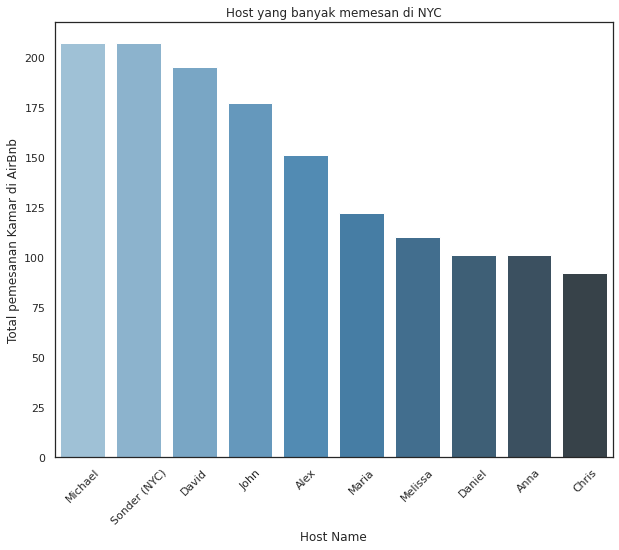

In [265]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

viz_1=sns.barplot(x="Host_Name", y="Hst_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Host yang banyak memesan di NYC')
viz_1.set_ylabel('Total pemesanan Kamar di AirBnb')
viz_1.set_xlabel('Host Name')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)
plt.show()

### Melihat luas masing masing wilayah untuk penyewaan kamar di NYC AirBnb (New York)

In [266]:
dataAirBnb.neighborhood_group.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [267]:
dataAirBnb.neighborhood.value_counts().head(10)

 Bedford-Stuyvesant    2195
 Williamsburg          1831
 Harlem                1425
 Bushwick              1188
 Hell's Kitchen        1106
 East Village           862
 Upper East Side        831
 Upper West Side        770
 Crown Heights          751
 East Harlem            663
Name: neighborhood, dtype: int64

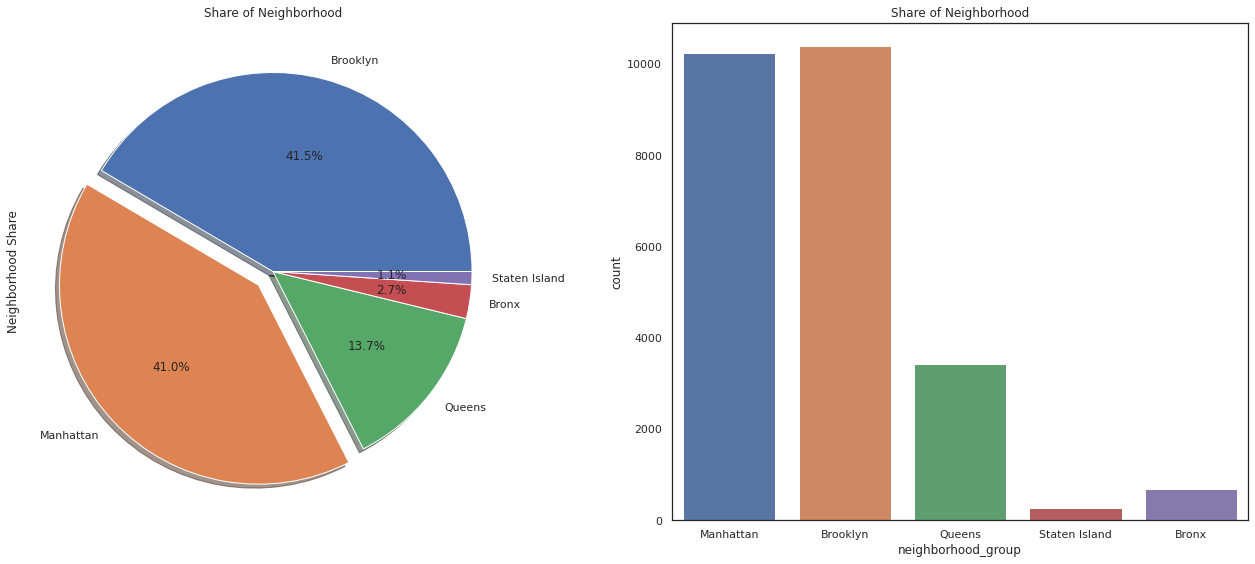

In [268]:
f, ax = plt.subplots(1,2,figsize=(18,8))
dataAirBnb['neighborhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighborhood_group',data=dataAirBnb,ax=ax[1])
ax[1].set_title('Share of Neighborhood')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa tempat sewa kamar paling banyak dimiliki oleh AirBnb di New York berada di Manhattan dan brooklyn

### Melihat hubungan yang terjadi antara wilayah yang banyak ditempati oleh kamar AirBnb di New york dengan tipe kamar dan harga yang ada

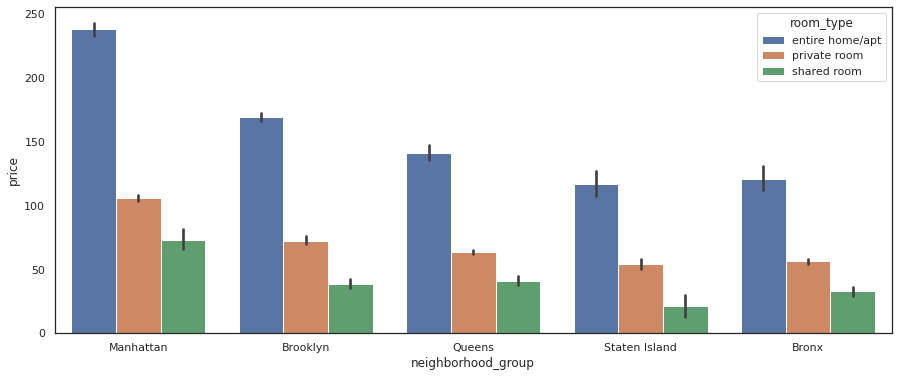

In [237]:
plt.figure(figsize=(15, 6))
sns.barplot(x='neighborhood_group', y='price', hue='room_type',data=dataAirBnb)
plt.show()

Dilihat dari harga sewa kamar berdasarkan room_type dan Wilayah tempat sewa, 
- Manhattan merupakan wilayah di New York dengan nilai harga sewa kamar tertinggi, dengan tipe ruangan kamar entire home/apt, disusul dengan harga sewa tertinggi kedua dengan tipe ruangan kamar private room.
- State Island dan Bronx memiliki tingkat harga sewa kamar paling rendah dari Manhattan dan Brooklyn dengan harga tingkat sewa kamar 100 Dollar lebih sedikit.

- dari kelima wilayah di new york, tempat sewa kamar AirBnb dengan tingkat harga sewa paling rendah terletak pada tipe ruangan kamar shared room, dengan harga rata-rata dibawah 50 dollars.

### Melihat hubungan antara jenis ruangan dan harga terkait.

Pertama melihat tingkat banyaknya sewa kamar dengan jenis tertentu di NYC AirBnb

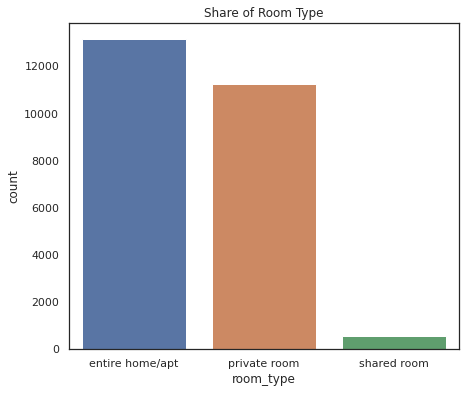

In [245]:
plt.figure(figsize=(7,6))
ax = sns.countplot('room_type',data=dataAirBnb,order=dataAirBnb['room_type'].value_counts().index)
ax.set_title('Share of Room Type')
plt.show()

Dapat dilihat, kamar dengan tingkat sewa paling rendah di NYC AirBnb terletak pada `shared room` dengan nilai harga/price kisaran 0-2000.

Sehingga untuk melihat korelasi/hubungan antara sewa kamar dengan harga, perlu
mengambil harga dengan kisaran 0-400 dengan tujuan agar ketiga jenis ruangan dapat terlihat dengan jelas harganya.

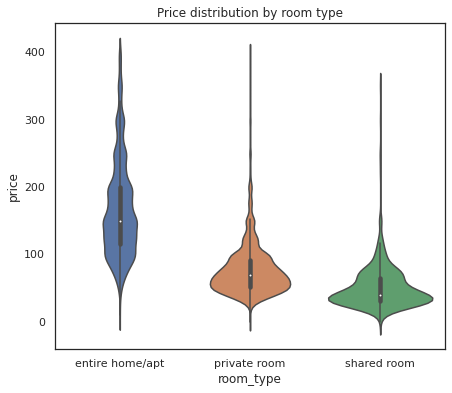

In [250]:
put_some_price=dataAirBnb[dataAirBnb.price < 400]

plt.figure(figsize=(7,6))
vioplot_rp=sns.violinplot(data=put_some_price, x='room_type', y='price')
vioplot_rp.set_title('Price distribution by room type')
plt.show()

Ternyata `harga sewa paling tinggi` terletak pada kamar dengan tipe ruangan `entire home/apt`

### Melihat Hubungan wilayah tempat sewa kamar AirBnb di sekitar New York dengan harga 

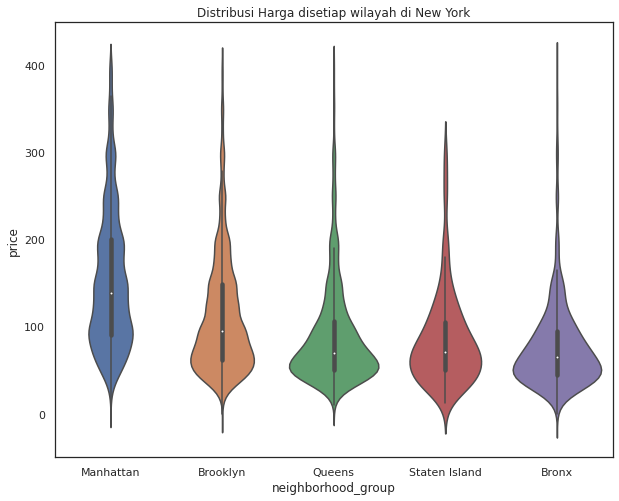

In [251]:
vioplot_ngh=sns.violinplot(data=put_some_price, x='neighborhood_group', y='price')
vioplot_ngh.set_title('Distribusi Harga disetiap wilayah di New York')
plt.show()

`Manhattan` menempati wilayah dengan `tingkat harga sewa kamar paling tinggi` dibanding wilaya lainnya di New York, sedangkan `Bronx, Staten Island, dan Queens` masih memiliki `tingkat harga sewa kamar yang masuk akal alias Normal`.

## Insight yang diperoleh dari analisa dataset NYC Airbnb

- Menunjukan bahwa persebaran tempat sewa kamar AirBnb di New York paling banyak diminati pengunjung berada di Manhattan.
- sedangkan tempat sewa kamar AirBnb di New york paling sedikit diminati berada diwilayah state island dan Bronx

- Jenis tipe ruangan kamar yang diminati oleh pengunjung/Host yaitu `entire home/apt`

Sehingga dari hal tersebut maka diperoleh solusi yaitu, 

1. diperlukannya meningkatkan kualitas terhadap layanan tipe ruangan kamar `shared room`, dan `private room` dikelima wilayah sewa kamar AirBnb yang berada dinew york.
2. Jika terdapat biaya/modal yang cukup, AirBnb di New York perlu melakukan peningkatan jumlah tempat sewa kamar di wilayah `State Island`, `Queens` dan `Bronx`, hal ini dikarenakan pada grafik Distribusi harga dikelima wilayah di New York menunjukan kurva skwenes yang positif.
3. Peminat AirBnb pada tipe ruangan kamar `entire home/apt` memiliki jumlah paling banyak dibandingkan 